# Импорт библиотек

In [48]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score



# Загрузка набора данных

In [18]:
df = pd.read_csv('ds1_unity.csv')
print(df.shape)
def info_df(df):
    # создаем набор данных
    data = pd.DataFrame()
    # Создаем индексы
    data.index = df.columns
    # Узнаем типы данных
    data['dtypes'] = df.dtypes
    # Количесвто пропущенных значений
    data['isna'] = df.isna().sum()
    # Процент пропущенных значений
    data['isna%'] = round((data['isna'] / df.shape[0])*100, 2)

    # Визуализируем количество пропущенных значений в последнем столбце 'isna%'
    return data

(34775, 18)


<ipython-input-18-f7eab365a1e1>:1: DtypeWarning: Columns (1,9,10,11,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ds1_unity.csv')


## Удаляем невводимые столбцы

In [20]:
df.drop(['Тип сделки',
         'Материал стен',
         'Лифт',
         'Количество информации в объявлении',
         'Год постройки'],
         axis = 1, inplace = True)

In [21]:
info_df(df)

,dtypes,isna,isna%
Цена,float64,133,0.38
Станция метро,object,11865,34.12
Минут до метро,float64,11964,34.40
Адрес,object,41,0.12
Количество комнат,float64,1887,5.43
Площадь,float64,0,0.00
Жилая площадь,float64,9653,27.76
Кухня площадь,float64,9791,28.16
Этаж,float64,4062,11.68
Количество этажей,object,13804,39.70


In [22]:
df = df[df['Цена'].notna()]
print(df.shape)

df = df[df['Адрес'].notna()]
print(df.shape)

(34642, 13)
(34601, 13)


Заполним пропущенные значения в столбце значением "0"

In [23]:
df.loc[df['Количество комнат'].isna(), 'Количество комнат'] = \
df.loc[df['Количество комнат'].isna(), 'Количество комнат'].fillna(float(0))

### Cтолбец "Адрес"

In [24]:
df['Адрес'] = df['Адрес'].apply(lambda x: x.replace('Россия,', ''))
df['Адрес'] = df['Адрес'].apply(lambda x: x.replace('Московская область', 'Московская'))
df['Адрес'] = df['Адрес'].apply(lambda x: x.replace(' Московская область', 'Московская'))
df['Адрес'] = df['Адрес'].apply(lambda x: x.replace(' Москва', 'Москва'))
df['Адрес'] = df['Адрес'].apply(lambda x: x.replace(' Московская', 'Московская'))
df['Адрес'] = df['Адрес'].apply(lambda x: x.replace('Московская обл', 'Московская'))
df['Адрес'] = df['Адрес'].apply(lambda x: x.replace(',', ' '))
df['Адрес'] = df['Адрес'].apply(lambda x: x.replace('гМосква', 'Москва'))
df['Адрес'] = df['Адрес'].apply(lambda x: x.replace('Московская.', 'Московская'))
df['Адрес'] = df['Адрес'].apply(lambda x: x.replace('городМосква', 'Москва'))
df['Адрес'] = df['Адрес'].apply(lambda x: x.replace('Люберецкий', 'Московская'))
df['Адрес'] = df['Адрес'].apply(lambda x: x.replace('Котельники', 'Москва'))
df['Адрес'] = df['Адрес'].apply(lambda x: x.replace('  ', ' '))

In [25]:
df.insert(3, 'Регион', np.nan)
df['Регион'] = df['Адрес'].apply(lambda x: x.split(' ')[0])
df = df[(df['Регион'] == 'Московская') | (df['Регион'] == 'Москва')]
df['Регион'] = df['Регион'].apply(lambda x: x.replace('Московская', 'Московская область'))

<ipython-input-25-305e4492c712>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Регион'] = df['Регион'].apply(lambda x: x.replace('Московская', 'Московская область'))


### "Станция метро"

In [26]:
df['Станция метро'] = df[df['Станция метро'].notna()]['Станция метро'].apply(lambda x: str(x).replace('станция ', ''))

In [27]:
df = df[df['Станция метро'].notna()]
df = df[df['Минут до метро'].notna()]

### "Ремонт"

In [28]:
df['Ремонт'] = df[df['Ремонт'].notna()]['Ремонт'].apply(lambda x: str(x).replace('Требует ремонта', 'Без ремонта')\
                                                                          .replace('Отсутствует', 'Без ремонта')\
                                                                          .replace('Под чистовой ремонт', 'Без ремонта')\
                                                                          .replace('no', 'Без ремонта')\
                                                                          .replace('чистовая отделка ', 'Без ремонта')\
                                                                          .replace('Предчистовая отделка', 'Без ремонта')\
                                                                          .replace('Требуется ремонт', 'Без ремонта')\
                                                                          .replace('отделка под чистовую', 'Без ремонта')\
                                                                          .replace('требуется', 'Без ремонта'))

In [29]:
df['Ремонт'] = df[df['Ремонт'].notna()]['Ремонт'].apply(lambda x: str(x).replace('Евро', 'Евроремонт')\
                                                       .replace('косметический', 'Косметический')\
                                                       .replace('евроремонт', 'Евроремонт')\
                                                       .replace('Хороший', 'Евроремонт')\
                                                       .replace('design', 'Дизайнерский')\
                                                       .replace('Авторский проект', 'Дизайнерский')\
                                                       .replace('euro', 'Евроремонт')\
                                                       .replace('cosmetic', 'Косметический')\
                                                       .replace('чистовая отделка', 'Без ремонта')\
                                                       .replace('Типовой', 'Евроремонт')\
                                                       .replace('с ремонтом', 'Евроремонт')\
                                                       .replace('Евро ремонт', 'Евроремонт')\
                                                       .replace('под ключ', 'Евроремонт'))
df['Ремонт'] = df[df['Ремонт'].notna()]['Ремонт'].apply(lambda x: str(x).replace('Евроремонтремонт', 'Евроремонт')\
                                                       .replace('С отделкой', 'Евроремонт')\
                                                       .replace('Частичный ремонт', 'Евроремонт')\
                                                       .replace('Евроремонт ремонт', 'Евроремонт'))

In [30]:
# Набор для заполнения пропущенных значений
repair = df.groupby(['Ремонт']).agg({'Цена': 'mean'})
repair.index.name = None
repair['Цена'] = repair['Цена'].apply(lambda x: '{:.2f}'.format(x))
repair = repair.sort_values(by = 'Цена', ascending = False)
repair

,Цена
Дизайнерский,97365382.88
Без ремонта,71663164.87
Евроремонт,38525704.15
Косметический,17441710.07


In [31]:
df.loc[(df['Цена'] >= 0) & (df['Цена'] < 17441710.07), 'Ремонт'] = \
df.loc[(df['Цена'] >= 0) & (df['Цена'] < 17441710.07), 'Ремонт'].fillna('Косметический')

df.loc[(df['Цена'] >= 17441710.07) & (df['Цена'] < 38525704.15), 'Ремонт'] = \
df.loc[(df['Цена'] >= 17441710.07) & (df['Цена'] < 38525704.15), 'Ремонт'].fillna('Евроремонт')

df.loc[(df['Цена'] >= 38525704.15) & (df['Цена'] < 71663164.87), 'Ремонт'] = \
df.loc[(df['Цена'] >= 38525704.15) & (df['Цена'] < 71663164.87), 'Ремонт'].fillna('Без ремонта')

df.loc[(df['Цена'] >= 71663164.87) & (df['Цена'] < 97365382.88), 'Ремонт'] = \
df.loc[(df['Цена'] >= 71663164.87) & (df['Цена'] < 97365382.88), 'Ремонт'].fillna('Дизайнерский')

df.loc[(df['Цена'] >= 97365382.88), 'Ремонт'] = \
df.loc[(df['Цена'] >= 97365382.88), 'Ремонт'].fillna('Дизайнерский')

### "Жилая площадь"

In [32]:
square = df[['Площадь', 'Жилая площадь', 'Кухня площадь']]
square.head(3)

,Площадь,Жилая площадь,Кухня площадь
0,30.6,11.1,8.5
2,49.2,20.0,10.0
3,44.7,16.2,13.1


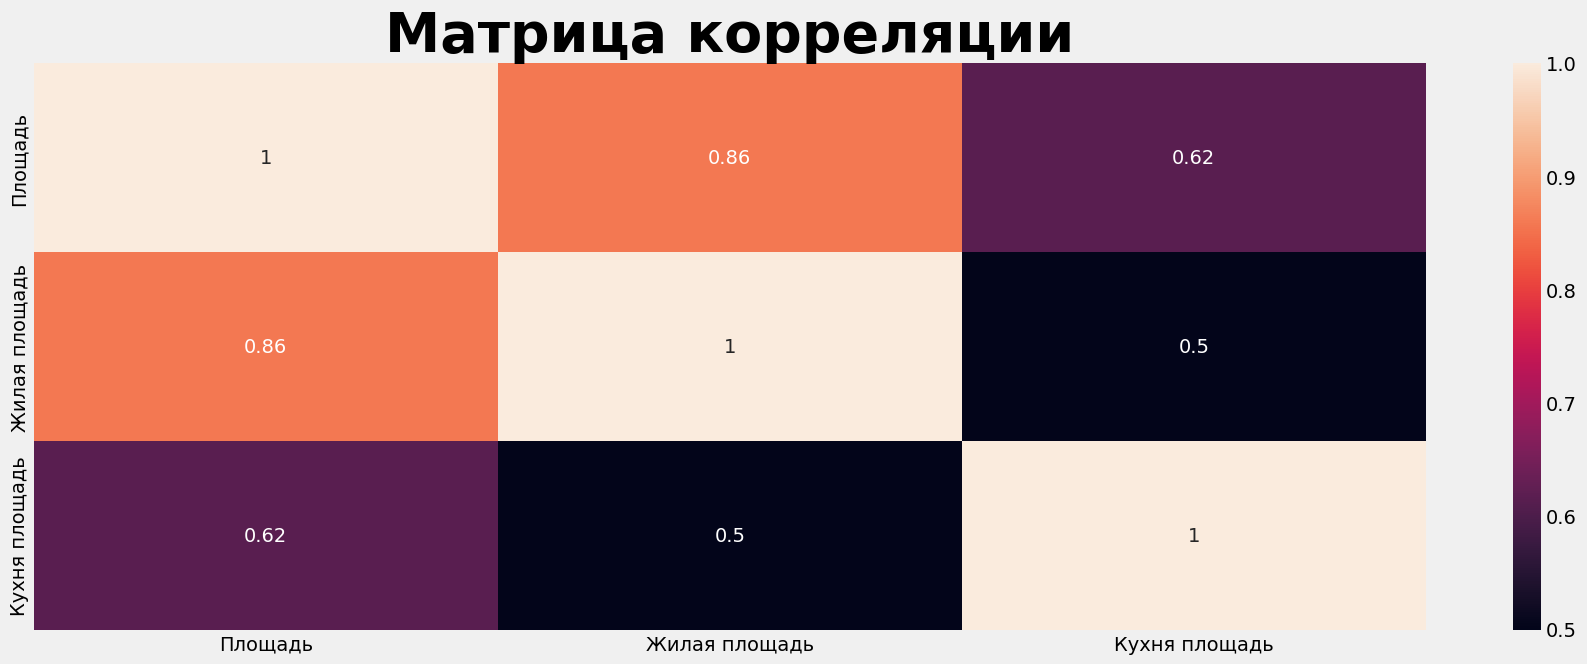

In [33]:
plt.subplots(figsize = (20,7))
correlation = square.corr()
sns.heatmap(correlation, annot = True)
plt.title('Матрица корреляции', fontsize = 40, fontweight = 'bold')
plt.show()

# Заполнение  с помощью LinearRegression

In [35]:
fill_lr = square.drop('Кухня площадь', axis = 1) #дл П ЛР
test = fill_lr[fill_lr['Жилая площадь'].isna()]

train = fill_lr[fill_lr['Жилая площадь'].notna()]

In [36]:
X = train['Площадь']
y = train['Жилая площадь']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [38]:
# Построим модель линейной регрессии через statsmodel.api

X = sm.add_constant(X)
model = sm.OLS(y, X)
res = model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          Жилая площадь   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                 4.323e+04
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:52:43   Log-Likelihood:                -67570.
No. Observations:               15389   AIC:                         1.351e+05
Df Residuals:                   15387   BIC:                         1.352e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1347      0.234      9.122      0.0

In [39]:
print(res.params)

const      2.134668
Площадь    0.505550
dtype: float64


 Площадь - 0.5055 - то есть жилая площадь равна половине общей площади квартиры

### Оценка модели линейной регрессии

In [44]:

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [46]:
train_pred = lr.predict(X_test)

# Метрики для проверки качества модели
mae = mean_absolute_error(y_test, train_pred)
mape = mean_absolute_percentage_error(y_test, train_pred)
r2 = r2_score(y_test, train_pred)
print('MAPE: ', round(mape * 100,2))
print('MAE: ', mae)
print('R2:', r2)

MAPE:  34.67
MAE:  9.596477867499145
R2: 0.7734153011785508


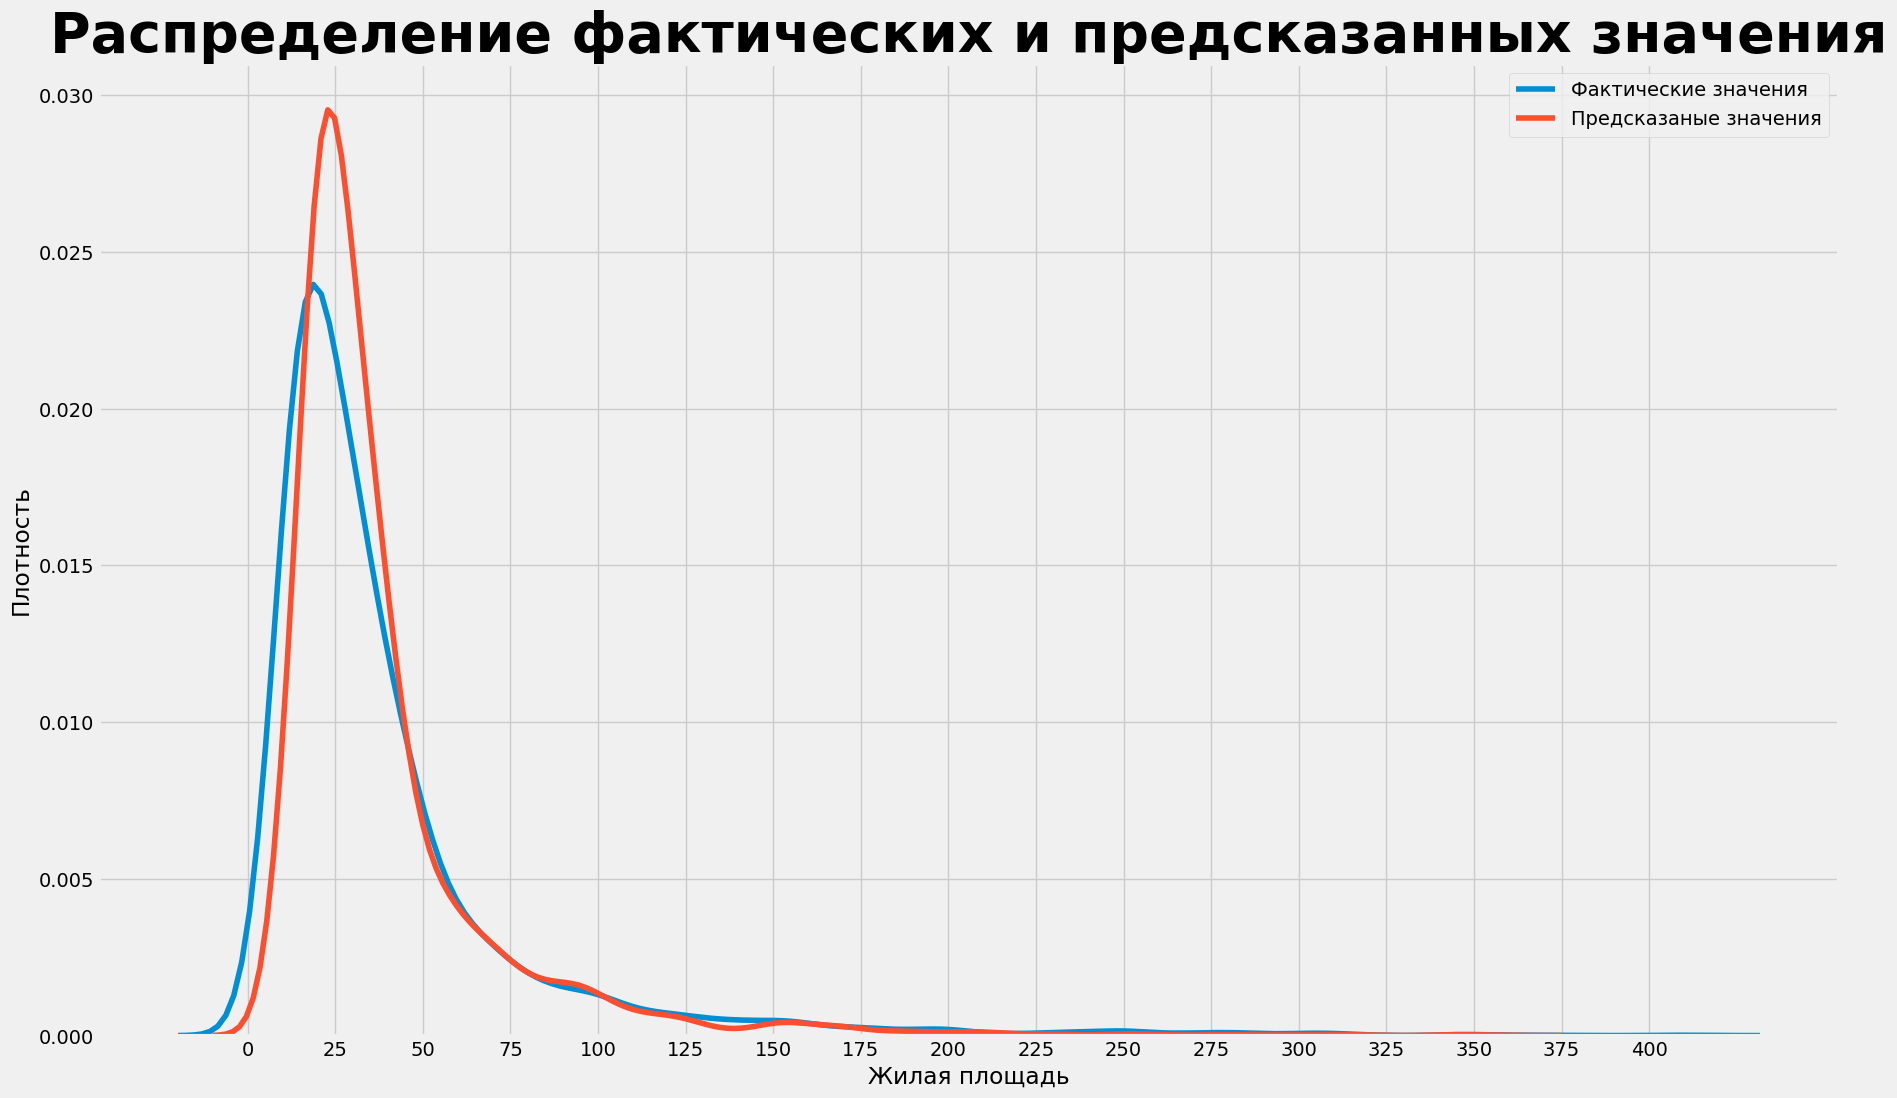

In [47]:
plt.subplots(figsize = (20,12))

sns.kdeplot(y_test, label='Фактические значения')
sns.kdeplot(train_pred, label='Предсказаные значения')

plt.title('Распределение фактических и предсказанных значения', fontsize = 40, fontweight = 'bold')
plt.ylabel('Плотность')
plt.legend()
plt.xticks(range(0,401,25))
plt.show()

Значения больше смещены вправо    
  Натренируем модель на полном наборе данных и заполним пропуски.

In [49]:
lr.fit(X,y)

LinearRegression()

### Заполняем пропуски

In [50]:
X_test = test['Площадь']
X_test = sm.add_constant(X_test)
test_pred = lr.predict(X_test)

In [51]:
test['Жилая площадь'] = test_pred
test['Жилая площадь'] = round(test['Жилая площадь'],1)
test.head(3)

<ipython-input-51-a9c79a1b4d8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Жилая площадь'] = test_pred
<ipython-input-51-a9c79a1b4d8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Жилая площадь'] = round(test['Жилая площадь'],1)


,Площадь,Жилая площадь
8,25.0,14.8
12,39.0,21.9
17,32.1,18.4


In [52]:
fill_values = test['Жилая площадь'].to_dict()

for index, value in fill_values.items():
    df.at[index, 'Жилая площадь'] = value

In [53]:
df['Жилая площадь'].isna().sum()

0

In [58]:
df.to_csv('clear_ds.csv', index=False)